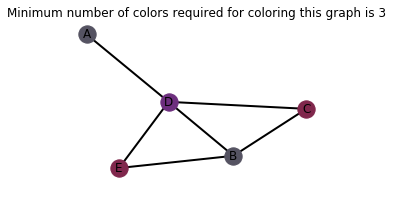

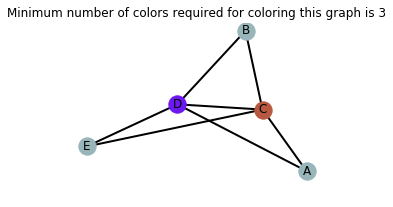

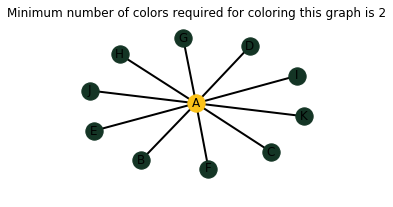

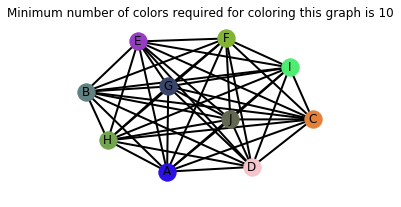

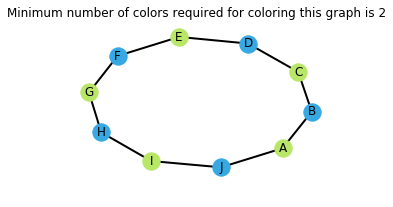

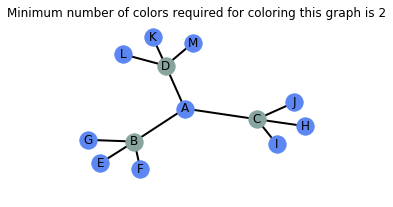

In [44]:
import networkx as nx
from math import *;
from random import *;
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

l=[]
l.append(nx.gnp_random_graph(5,0.3))
l.append(nx.gnp_random_graph(5,0.7))
l.append(nx.star_graph(10))
l.append(nx.complete_graph(10))
l.append(nx.cycle_graph(10))
l.append(nx.balanced_tree(3,2))


def randomColor():
    """
        Method for generating COlors for assigning to the nodes
    """
    letters="0123456789ABCDEF"
    color="#"
    for i in range(6):
        color+=letters[floor(random()*16)]
    return color
def clr_gr(G,ind):
    """
        Method used for COloring the Grpah
    """
    m=nx.convert_matrix.to_numpy_matrix(G).tolist()
    mx=0
    deg={}
    for i in range(len(list(m))):
        d=0
        for j in list(m[i]):
            if j>0:
                d+=1
        deg[i]=d
        if d>mx:
            mx=d

    n=mx+1


    list_color=[]
    while(n>0):
        f2=randomColor()
        if f2 not in list_color:
            list_color.append(f2)
            n = n - 1


    D={}
    for i in range(len(m)):
        D[i]=list(list_color)


    color={}
    for i in list(D.keys()):
        k=sel_node(D,deg)
        color[k]=D[k][0]
        del D[k]
        del deg[k]
        pl=list(D.keys())
        for hl in pl:
            if m[k][hl]>0.0:
                if color[k] in D[hl]:
                    D[hl].remove(color[k])
    #print("Color Assigned to each node:",color) 
    """
        Used for printing the color allocation dictionary
    """
    #print("Minimum Number of overlapping channels/Minimum No of colors:",len(set(color.values())))
    return color,len(set(color.values()))


    
def sel_node(D,ndeg):
    """
        Select the node which has to be colored
    """
    n_s={}
    l=[]
    for i in list(D.keys()):
        n_s[i]=len(D[i])
        l.append(len(D[i]))
    m_mrv=min(l)
    mx_deg=-999999
    s_node=0
    for i in list(D.keys()):
        if n_s[i]==m_mrv:
            if ndeg[i]>mx_deg:
                mx_deg=ndeg[i]
                s_node=i
    return s_node

    
def gr_plt(G,color,ind,cl):
    
    """
        For plotting each graph after the coloring process 
    """
    
    #get_ipython().run_line_magic('matplotlib', 'inline')
    pos=nx.spring_layout(G)
    
    m=nx.convert_matrix.to_numpy_matrix(G).tolist()
    
    
    f = plt.figure(figsize=(10,10))
    tlt=f.add_subplot(3,2,ind)
    tlt.set_title("Minimum number of colors required for coloring this graph is "+str(cl))
    for i in range(len(m)):
        nx.draw_networkx_nodes(G,pos,nodelist=[i],with_label=True,node_color=color[i])

    E=[]
    for i in range(len(m)):
        for j in range(len(m[i])):
            if m[i][j]>0.0:
                if((j,i) not in E):             
                    E.append((i,j))
    nm={}
    for i in range(len(m)):
        nm[i]=chr(65+i)
    nx.draw_networkx_edges(G,pos,
                           edgelist=E,
                           width=2,alpha=1,edge_color='black')
    nx.draw_networkx_labels(G,pos,nm)
    plt.axis("off")

nd_clr={}

for i in range(len(l)):
    nd_clr[i],min_clr=clr_gr(l[i],i+1)
    gr_plt(l[i],nd_clr[i],i+1,min_clr)
